importing dependancies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and Processing

In [4]:
#loading data from csv file to pandas dataframe
car_data = pd.read_csv('/content/Car_Data.csv')


In [5]:
#inspecting first 5 rows of dataframe
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
#checking the number of rows and columns
car_data.shape

(4340, 8)

In [7]:
#getting some information about dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
#checking the number of missing values
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
#checking the distribution of catagorical data
print(car_data.fuel.value_counts())
print(car_data.seller_type.value_counts())
print(car_data.transmission.value_counts())
print(car_data.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding catagorical data

In [10]:
#encoding the fuel data
car_data.replace({'fuel':{'Petrol':0, 'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace = True)

#encoding the seller_type data
car_data.replace({'seller_type':{'Dealer':0, 'Individual':1,'Trustmark Dealer':2}}, inplace = True)

#encoding the transmission data
car_data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

#encoding the transmission data
car_data.replace({'owner':{'First Owner':0, 'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace = True)


In [11]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


Splitting the data and target

In [12]:
X = car_data.drop(['name','selling_price'],axis=1)
Y = car_data['selling_price']

In [13]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [14]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Split Training and Test Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
#model training
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [18]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [19]:
#R squared error
error = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", error)

R squared error :  0.42333105707286967


Visualize the actual price vs predicted price

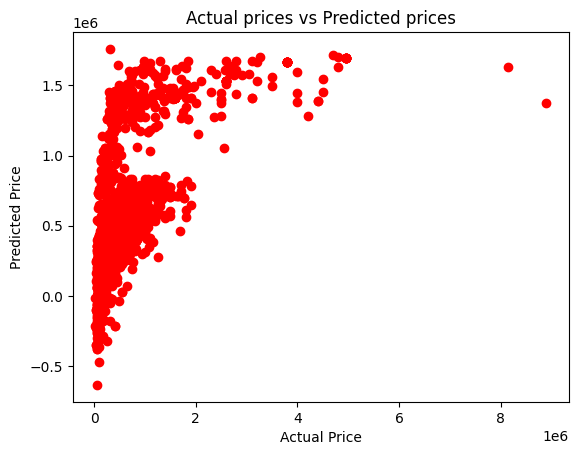

In [24]:
plt.scatter(y_train, training_data_prediction,c='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [22]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [25]:
#R squared error
error = metrics.r2_score(y_test, test_data_prediction)
print("R squared error on test data : ", error)

R squared error on test data :  0.4847632807653801


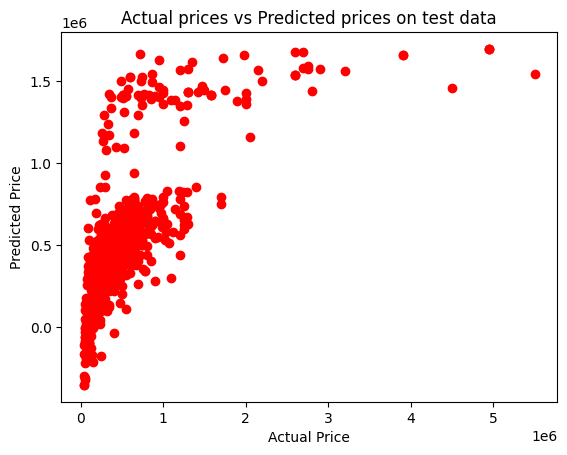

In [26]:
plt.scatter(y_test, test_data_prediction,c='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices on test data")
plt.show()

2. Lasso Regression

In [35]:
#model training, loading lasso regression model
lasso_reg_model = Lasso()

In [36]:
lasso_reg_model.fit(x_train, y_train)

Lasso()

Model Evaluation

In [29]:
#prediction on training data
training_data_prediction = lasso_reg_model.predict(x_train)

In [37]:
#R squared error
error_l = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", error_l)

R squared error :  0.4233310570179156


Visualize the actual price vs predicted price

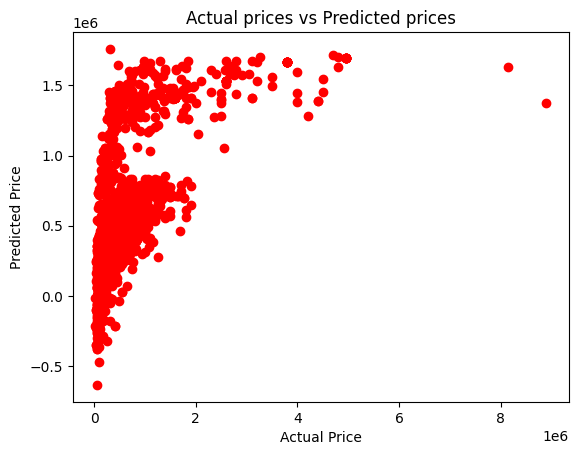

In [31]:
plt.scatter(y_train, training_data_prediction,c='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [38]:
#prediction on test data
test_data_prediction = lasso_reg_model.predict(x_test)

In [39]:
#R squared error
error = metrics.r2_score(y_test, test_data_prediction)
print("R squared error on test data : ", error)

R squared error on test data :  0.48476306480201936


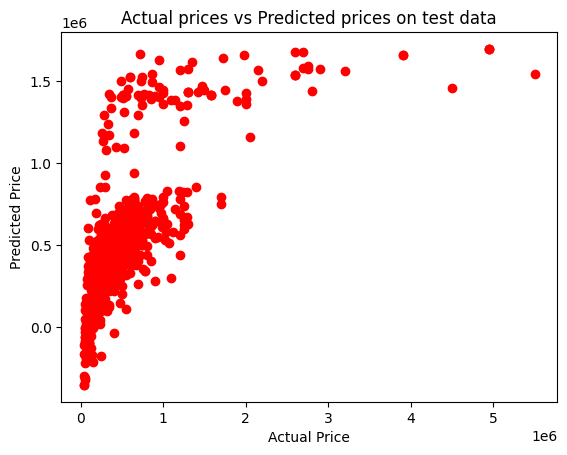

In [40]:
plt.scatter(y_test, test_data_prediction,c='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices on test data")
plt.show()